## Sentiment Analysis: IMDB Movie Reviews

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('imdb/IMDB_Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Checking if we have any null values in the dataset

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Converting Categorical Labels into Discrete

In [5]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Exploring Data

#### Positive Review Example

In [7]:
positive = data[data.sentiment == 1].sample(n = 1)['review'].iloc[0]
positive

"This is one of those rare comedies where try as you might, you can't help but giggle, chortle, guffaw and yes, even laugh out loud. The lead actor's performance as Hyde is pure manic genius. See if you can keep a straight face when he does his transformation. Good luck. :) On the downside there are times when the movie does bog down. It seemed longer than its 90 minutes."

#### Negative Review Example

In [8]:
negative = data[data.sentiment == 0].sample(n = 1)['review'].iloc[0]
negative

"After an intriguing start, this little drama quickly descends into the ranks of sheer mediocrity. The start of the movie sees two women (Heather Graham and Natasha Gregson Wagner) meet each other while waiting for their boyfriends to get home from their holidays. Natasha Gregson Wagner is a lovely looking actress, and she plays Louise; a cute girl whose beloved boyfriend is an all round entertainer; music, movies you name it, he does it. While she's telling the other girl, Carla (Heather Graham) all about her wonderful boyfriend, it soon becomes apparent that the similarities between their two male friends are too much.... and it's obvious that the two girls are dating the same guy. Oh Dear. Enter Robert Downey Jnr, the sleaze-bag that has two girlfriends while some poor guy somewhere has to go without one. Downey plays the sort of guy that the ladies like, but men find repulsively annoying; he is, basically, a mummy's boy. The worst kind too; on the phone ringing mother all the time,

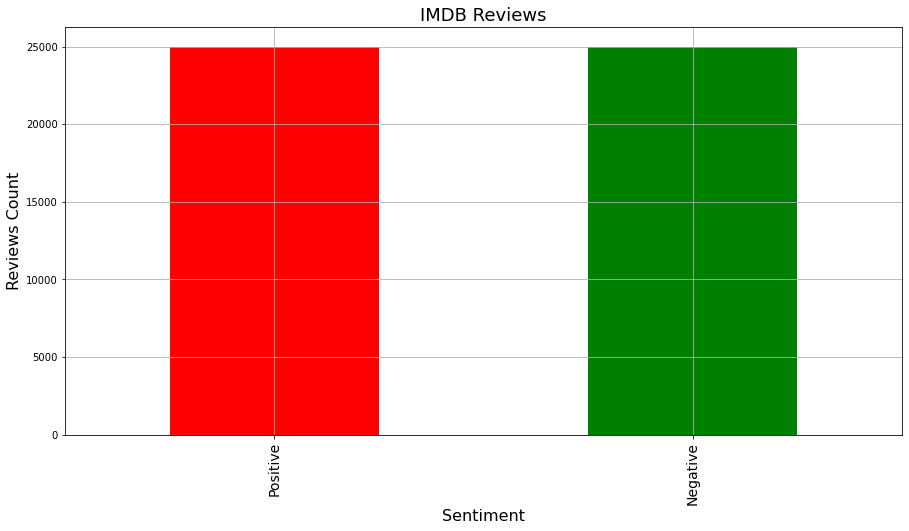

In [9]:
fig, axs = plt.subplots(figsize = (15,7.5))

data['sentiment'].value_counts().plot.bar(color = ['red', 'green'])

plt.xticks(np.arange(2), ('Positive', 'Negative'), fontsize = 14)
axs.set_title('IMDB Reviews', fontsize = 18)
axs.set_xlabel('Sentiment', fontsize = 16)
axs.set_ylabel('Reviews Count', fontsize = 16)
axs.grid()
plt.show()

In [10]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### 1) Removing HTML Tags using Regular Expression

In [11]:
data.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [12]:
data1 = []
for review in data.review.values:
    data1.append((review))

#### Dealing with the stopwords

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
import re

#### Preprocessing 

****Removing HTML tags****

****Removing irrelevant characters****

****Converting entire corpus into lower case****

****Removing stopwords****

****Converting entire dataset into lowercase****

****Tokenization****

****Normalization (Lemmatization)****

In [16]:
preprocessed_review = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    review = review.lower()                                 # Converting all the text in reviews to lower case
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    preprocessed_review.append(lemmas)


In [17]:
print(preprocessed_review[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [18]:
len(preprocessed_review)

50000

In [19]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [20]:
X = data.drop(['sentiment'], axis = 1)
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [21]:
X.shape

(50000, 1)

### BOW Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vector = CountVectorizer(min_df = 25)  # min_df parameter implies minimum number of times that a word appears in corpus
                                           # it accepts an integer value (n) and then vectorizes a number only if it appears n times
X_bow = bow_vector.fit_transform(preprocessed_review)

bow_feature_name = bow_vector.get_feature_names()
bow_feature_name = np.array(bow_feature_name)

In [27]:
X_bow.shape

(50000, 14081)

In [28]:
bow_feature_name.shape

(14081,)

In [29]:
bow_feature_name.size

14081

In [30]:
d = pd.DataFrame(X_bow.toarray(), columns  = bow_feature_name)
d.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_bow, y, test_size = 0.3, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((35000, 14081), (35000,))
shape of testing data is: ((15000, 14081), (15000,))


#### Naive Bayes with BOW Vectorized Reviews

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8502666666666666


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [35]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7507
           1       0.86      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



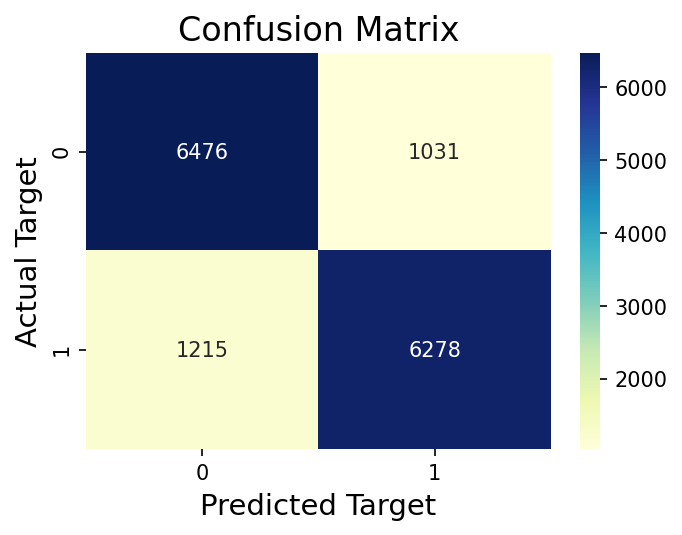

In [36]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')


#### Logistic Regression with BOW Vectorized Reviews

In [37]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(xtrain, ytrain)
logic_pred = logic.predict(xtest)
print(logic_pred)
logic_acc = accuracy_score(ytest, logic_pred)
print(f'Logistic Regression Gave an accuracy  of {logic_acc}')

[1 1 1 ... 1 1 1]
Logistic Regression Gave an accuracy  of 0.8743333333333333


G:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
logic_report = classification_report(ytest, logic_pred)
print(logic_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7507
           1       0.87      0.88      0.87      7493

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



Text(0.5, 1.0, 'Confusion Matrix')

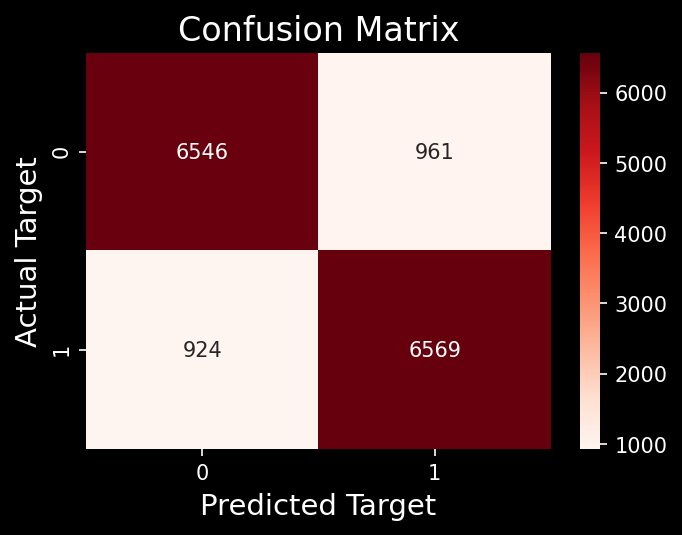

In [39]:
logic_cm = confusion_matrix(ytest, logic_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(logic_cm, annot = True, fmt = 'd', cmap="Reds")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)


#### Decision Tree with BOW Vectorized Reviews

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)

DT_pred = DT.predict(xtest)
print(DT_pred)
        
DT_acc = accuracy_score(ytest, DT_pred)
print(f'Decision Tree gave an accuracy  of {DT_acc}')

[0 1 0 ... 0 1 1]
Decision Tree gave an accuracy  of 0.7203333333333334


In [42]:
DT_report = classification_report(ytest, DT_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7507
           1       0.72      0.72      0.72      7493

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



Text(0.5, 1.0, 'Confusion Matrix')

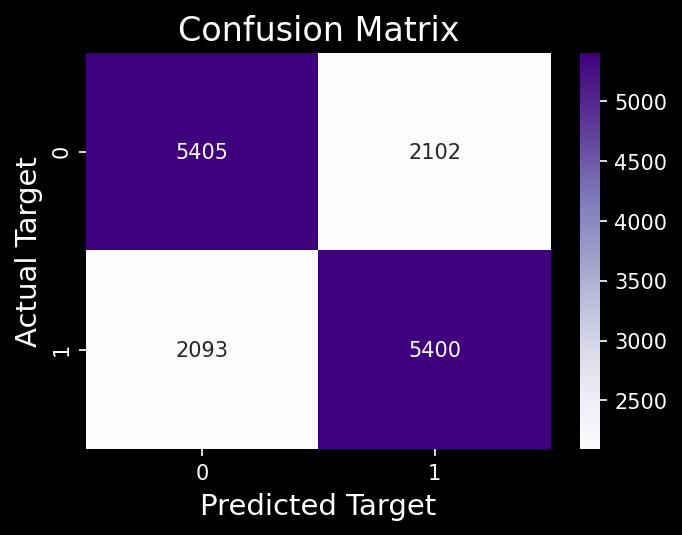

In [43]:
DT_cm = confusion_matrix(ytest, DT_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(DT_cm, annot = True, fmt = 'd', cmap="Purples")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Random Forest with BOW Vectorized Reviews

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)

Rf_pred = RF.predict(xtest)
print(Rf_pred)

[1 1 1 ... 1 1 1]


In [46]:
RF_acc = accuracy_score(ytest, Rf_pred)
print(f'Random Forest gave an accuracy  of {RF_acc}')

Random Forest gave an accuracy  of 0.8506666666666667


In [47]:
RF_report = classification_report(ytest, Rf_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7507
           1       0.85      0.85      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



Text(0.5, 1.0, 'Confusion Matrix')

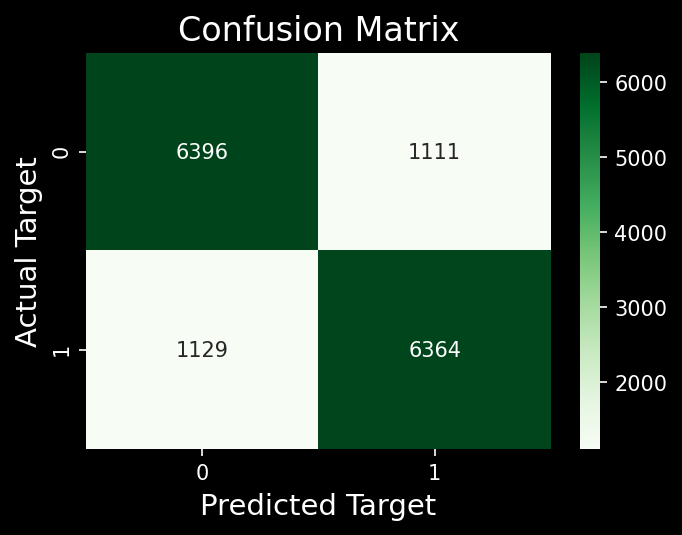

In [48]:
RF_cm = confusion_matrix(ytest, Rf_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap="Greens")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


### TF-IDF Vectorization

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(preprocessed_review)

tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

In [51]:
X_tfidf.shape

(50000, 14081)

In [52]:
tfidf_feature_name.shape

(14081,)

In [53]:
tfidf_feature_name.size

14081

In [54]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.061968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.214341,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((35000, 14081), (35000,))
shape of testing data is: ((15000, 14081), (15000,))


#### Naive Bayes with TF-IDF Reviews

In [56]:
naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8593333333333333


In [58]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7507
           1       0.86      0.86      0.86      7493

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



Text(0.5, 1.0, 'Confusion Matrix')

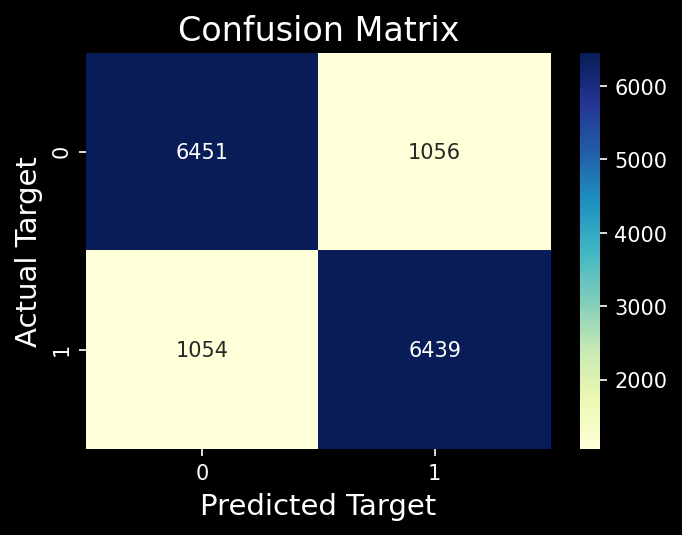

In [59]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Logistic Regression with TF-IDF Vectorized Reviews

In [60]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(xtrain, ytrain)
logic_pred = logic.predict(xtest)
print(logic_pred)
logic_acc = accuracy_score(ytest, logic_pred)
print(f'Logistic Regression Gave an accuracy  of {logic_acc}')

[1 1 1 ... 1 1 1]
Logistic Regression Gave an accuracy  of 0.8879333333333334


In [61]:
logic_report = classification_report(ytest, logic_pred)
print(logic_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7507
           1       0.88      0.90      0.89      7493

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



Text(0.5, 1.0, 'Confusion Matrix')

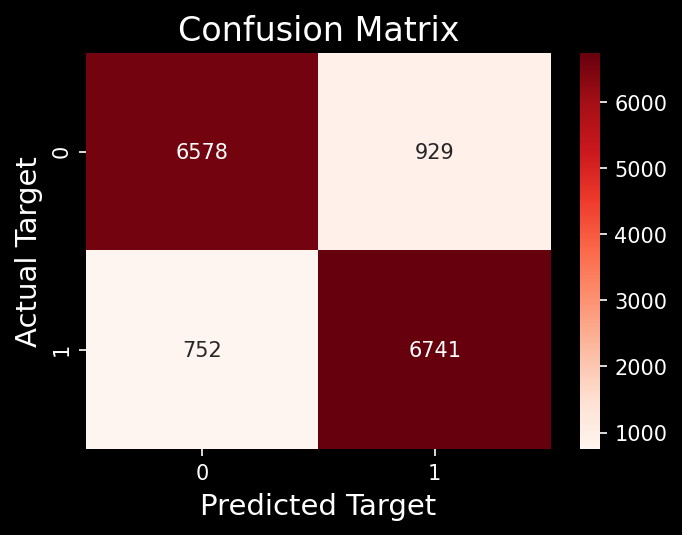

In [62]:
logic_cm = confusion_matrix(ytest, logic_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(logic_cm, annot = True, fmt = 'd', cmap="Reds")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)

#### Decision Tree with TF-IDF Vectorized Reviews

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)

DT_pred = DT.predict(xtest)
print(DT_pred)
        
DT_acc = accuracy_score(ytest, DT_pred)
print(f'Decision Tree gave an accuracy  of {DT_acc}')

[1 1 0 ... 1 1 0]
Decision Tree gave an accuracy  of 0.7119333333333333


In [65]:
DT_report = classification_report(ytest, DT_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7507
           1       0.71      0.72      0.71      7493

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000



Text(0.5, 1.0, 'Confusion Matrix')

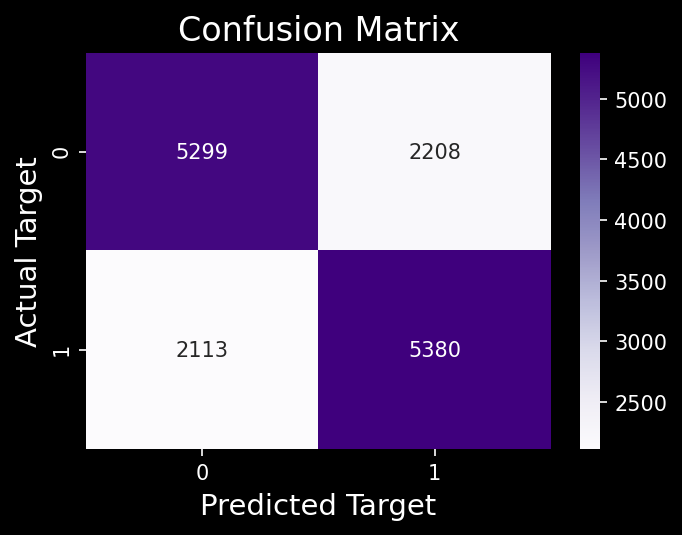

In [66]:
DT_cm = confusion_matrix(ytest, DT_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(DT_cm, annot = True, fmt = 'd', cmap="Purples")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Random Forest with TF-IDF Vectorized Reviews

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)

Rf_pred = RF.predict(xtest)
print(Rf_pred)

[1 1 0 ... 1 1 1]


In [69]:
RF_acc = accuracy_score(ytest, Rf_pred)
print(f'Random Forest gave an accuracy  of {RF_acc}')

Random Forest gave an accuracy  of 0.8498


In [70]:
RF_report = classification_report(ytest, Rf_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7507
           1       0.85      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



Text(0.5, 1.0, 'Confusion Matrix')

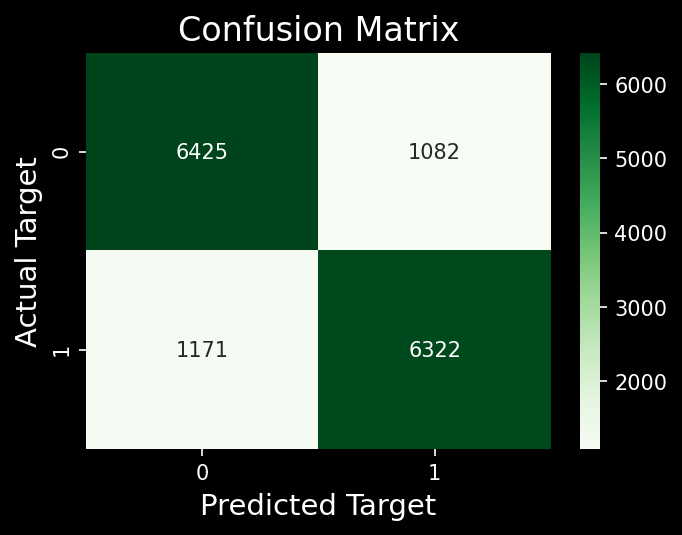

In [71]:
RF_cm = confusion_matrix(ytest, Rf_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap="Greens")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')
